In [1]:
import pandas as pd

In [60]:
df=pd.read_csv('method_for_sentiment.csv')

In [27]:
df.columns

Index(['Unnamed: 0', 'Cleaned_tweet', 'Polarity'], dtype='object')

In [23]:
#vader
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [24]:
nltk.download('vader_lexicon') # download the lexicon if it is not already downloaded
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [31]:
def get_sentiment(tweet):
    sentiment_score = analyzer.polarity_scores(tweet)['compound']
    if sentiment_score >= 0.05:
        return 'positive'
    elif sentiment_score <= -0.05:
        return 'negative'
    else:
         return 'neutral'

In [32]:
df['sentiment_scores_vader'] =df['Cleaned_tweet'].apply(get_sentiment)


In [33]:
df

,Unnamed: 0,Cleaned_tweet,Polarity,sentiment_scores_vader
0,72,usually would angry sh take app last time ch...,-0.250000,negative
1,73,patient year old boy infancy gt oral lesion r...,0.000000,positive
2,74,the truth ufo fever grip congress politico,0.000000,positive
3,75,patient year old boy infancy gt oral lesion re...,0.000000,positive
4,76,spent valentine 's day huge fever headache f...,0.200000,positive
5,77,burn ca n't hold now you got nothing stop m...,0.000000,positive
6,78,condo property manager sick day developed per...,-0.307143,negative
7,79,thank lee mergner marvelous wbgo interview new...,0.568182,positive
8,80,this warned hemorhagic fever similar ebola...,0.000000,negative
9,81,feeling kaafi sick rn fever killing,-0.714286,negative


In [34]:
#using positive and negative word count
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [35]:
lemma = WordNetLemmatizer()
stop_words = stopwords.words('english')

In [36]:
def text_prep(x: str) -> list:
    
    corp = str(x).lower() 
    corp = re.sub('[^a-zA-Z]+',' ', corp).strip() 
    tokens = word_tokenize(corp)
    words = [t for t in tokens if t not in stop_words]
    lemmatize = [lemma.lemmatize(w) for w in words]
    return lemmatize

In [38]:
preprocess_tag = [text_prep(i) for i in df['Cleaned_tweet']]
df["preprocess_txt"] = preprocess_tag

In [39]:
df['total_len'] = df['preprocess_txt'].map(lambda x: len(x))

In [40]:
file = open('negative-words.txt', 'r')
neg_words = file.read().split()
file = open('positive-words.txt', 'r')
pos_words = file.read().split()

In [41]:
num_pos = df['preprocess_txt'].map(lambda x: len([i for i in x if i in pos_words]))
df['pos_count'] = num_pos
num_neg = df['preprocess_txt'].map(lambda x: len([i for i in x if i in neg_words]))
df['neg_count'] = num_neg

In [42]:
df['sentiment_normalization'] = round((df['pos_count'] - df['neg_count']) / df['total_len'], 2)
if sentiment_score >= 0.05:
        return 'positive'
    elif sentiment_score <= -0.05:
        return 'negative'
    else:
         return 'neutral'


In [49]:
#Using Positive and Negative Word Counts – With Semi Normalization to calculate Sentiment Score
df['semi_normalization_sentiment'] = round((df['pos_count'] - df['neg_count']) / (df['neg_count']+1), 2)


In [57]:
df.to_csv('method_for_sentiment.csv')

In [61]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Cleaned_tweet', 'textblob', 'vader',
       'preprocess_txt', 'total_len', 'pos_count', 'neg_count',
       'normalization', 'semi_normalization', 'actual'],
      dtype='object')

In [62]:

df.drop(['Unnamed: 0', 'Unnamed: 0.1'],axis=1,inplace=True)

In [72]:
#accuracy for textblob
df[df['actual'].str.lower()==df['semi_normalization'].str.lower()]

,Cleaned_tweet,textblob,vader,preprocess_txt,total_len,pos_count,neg_count,normalization,semi_normalization,actual
0,usually would angry sh take app last time ch...,neagtive,negative,"['usually', 'would', 'angry', 'sh', 'take', 'a...",11,0,2,negative,negative,Negative
1,patient year old boy infancy gt oral lesion r...,neutral,positive,"['patient', 'year', 'old', 'boy', 'infancy', '...",15,1,2,negative,negative,Negative
3,patient year old boy infancy gt oral lesion re...,neutral,positive,"['patient', 'year', 'old', 'boy', 'infancy', '...",14,1,2,negative,negative,Negative
4,spent valentine 's day huge fever headache f...,positive,positive,"['spent', 'valentine', 'day', 'huge', 'fever',...",7,1,2,negative,negative,Negative
9,feeling kaafi sick rn fever killing,negative,negative,"['feeling', 'kaafi', 'sick', 'rn', 'fever', 'k...",6,0,3,negative,negative,Negative
13,caught baby fever soooooo bad yesterday,negative,negative,"['caught', 'baby', 'fever', 'soooooo', 'bad', ...",6,0,2,negative,negative,Negative
21,high fever ..,positive,neutral,"['high', 'fever']",2,0,1,negative,negative,Negative
36,nowplaying top feat dvi psychic fever exile tr...,positive,positive,"['nowplaying', 'top', 'feat', 'dvi', 'psychic'...",11,2,2,neutral,neutral,Neutral
37,im mad cause tf woke fever,negative,negative,"['im', 'mad', 'cause', 'tf', 'woke', 'fever']",6,0,2,negative,negative,Negative
38,checking in. i definitely tell im improving f...,positive,positive,"['checking', 'definitely', 'tell', 'im', 'impr...",10,3,1,positive,positive,Positive


In [77]:
#accuracy for text blob
text_blob =21/39 

In [78]:
vader=15/39 #vader

In [79]:
normal=10/39 #normal

In [80]:
semi=10/39 #semi normal

In [82]:
values = [text_blob , vader, normal, semi]
labels = ['textblob', 'Vader', 'normal', 'semi']

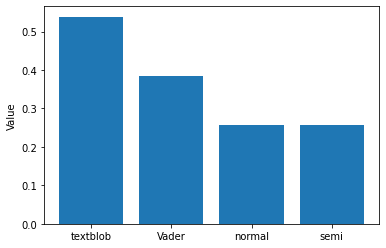

In [84]:
import matplotlib.pyplot as plt
# Create the bar chart
plt.bar(range(len(values)), values)

# Add labels to the x-axis and y-axis
plt.xticks(range(len(values)), labels)
plt.ylabel('Value')

# Display the chart
plt.show()